# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (20)

# `ALEJANDRO SÁNCHEZ MONZÓN`

**29/01/2024**

## Feature Engineering (Ingeniería de variables)

---

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [3]:
# pip install -U scikit-learn

---

### Dataset de [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) 

In [4]:
from sklearn.datasets import load_breast_cancer

# Construimos un dataframe con los datos medidos
dataset_cancer = pd.DataFrame(load_breast_cancer()["data"], columns=load_breast_cancer()["feature_names"])

# Añadimos la etiqueta
dataset_cancer["label"] = load_breast_cancer()["target_names"][load_breast_cancer()["target"]]

dataset_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [5]:
# Filtrar los datos numéricos
df_cancer_num = dataset_cancer.drop("label", axis='columns')
df_cancer_num

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado_cancer = StandardScaler().fit(df_cancer_num)
dataset_cancer_normal = escalado_cancer.transform(df_cancer_num)
dataset_cancer_normal

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [7]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
df_cancer_normal = pd.DataFrame(dataset_cancer_normal, columns=df_cancer_num.columns)
print(type(df_cancer_normal))
df_cancer_normal

<class 'pandas.core.frame.DataFrame'>


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


---

### **`Ejercicio 20.1`**

Vamos a realizar un ejercicio de **_clustring_** usando la técnica de **_K-Means_** para agrupar los tejidos conseguidos por autópsia de varios pacientes que realizarón el diagnóistico de cancer de mama:

**`20.1.1`** Utiliza la técnica de __K-Means clustering__ para agrupar los núcleso celulares en **2 grupos**. Grafica los resultados, visualizando los puntos de datos por sus valores relacionados a las variables _`mean radius` versus `mean symmetry`_, pintando cada punto por su `cluster` junto con los `centroides` de cada grupo y saca las métricas para evaluar el algoritmo de agrupación:
 - SSE
 - Silhouette score
 - `random_state=100`

**`20.1.2`** Calcula para este primer modelo **el porcentage de acierto** de acuerdo con las etiquetas reales como `malignant` y `benign`.

**`20.1.3`** Aplica un análisis de componentes principales usando el método `PCA` de la librería _sklearn_ para llevar los datos a un espacio bidimensional. Calcula **el porcentaje total de varianza** que incluyen los dos componentes principales juntos. Y visualiza en una gráfica los datos proyeccionados con sus etiquetas reales como `malignant` y `benign`.

**`20.1.4`** Utiliza la técnica de __K-Means clustering__ para agrupar los **datos transformados** en 2 grupos. Grafica los resultados, visualizando los puntos de datos pintandos por su `cluster` junto con los `centroides` de cada grupo y saca las métricas para evaluar el algoritmo de agrupación:
 - SSE
 - Silhouette score
 - `random_state=100`

**`20.1.5`** Calcula para este último modelo creado con los datos proyeccionados, **el porcentage de acierto** de acuerdo con las etiquetas reales como `malignant` y `benign`. Después, **analiza y compara** el rendimiento de este modelo con el modelo desarrollado sobre los datos originales y **explica** si ha aportado algo la aplicación de la técnica de **PCA** en este caso.


In [8]:
## Solución 20.1.1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

modelo_20_1_1 = KMeans(n_clusters=2, random_state=100)

modelo_20_1_1.fit(df_cancer_normal)

y_etiquetas_20_1_1 = modelo_20_1_1.labels_

centros_clust_20_1_1 = modelo_20_1_1.cluster_centers_

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [9]:
print("SSE = ", modelo_20_1_1.inertia_)
print("Silhouette score = ", silhouette_score(df_cancer_normal, y_etiquetas_20_1_1))

SSE =  11595.526607115782
Silhouette score =  0.34338224069077816


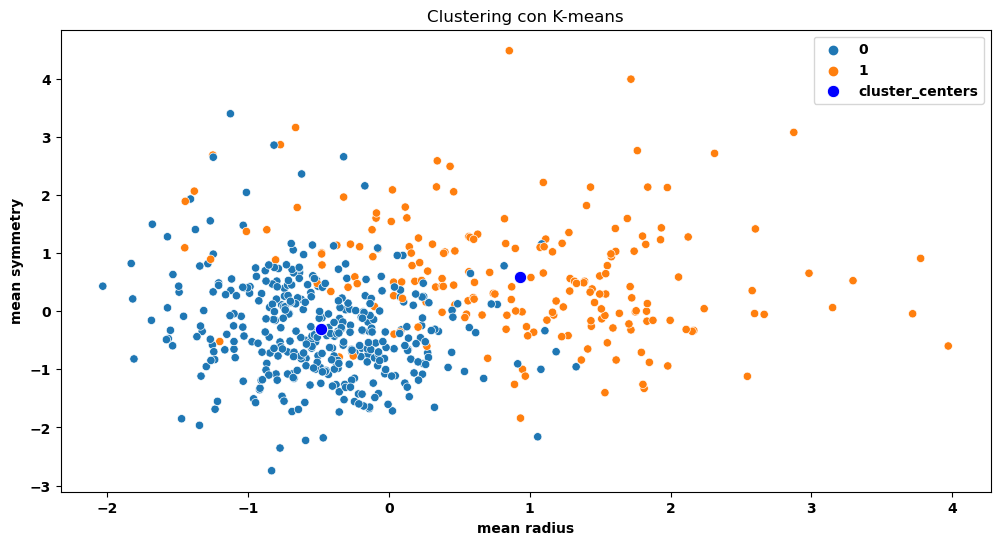

In [10]:
sns.scatterplot(x=df_cancer_normal['mean radius'], y=df_cancer_normal['mean symmetry'], hue=y_etiquetas_20_1_1)

sns.scatterplot(x=centros_clust_20_1_1[:,df_cancer_normal.columns.get_loc('mean radius')],
                y=centros_clust_20_1_1[:,df_cancer_normal.columns.get_loc('mean symmetry')],
                color='blue', s=80, label='cluster_centers')

plt.title("Clustering con K-means")
plt.show()


In [11]:
## Solución 20.1.2
y_label_20_1_2 = np.where(y_etiquetas_20_1_1 == 0, 'benign', 'malignant')

y_label_20_1_2 = pd.Series(y_label_20_1_2, name='label')

In [12]:
diff_pos_20_1_2 = [i for i in range(len(y_label_20_1_2)) if y_label_20_1_2[i] != dataset_cancer['label'][i]]

print("El modelo de clustering se ha equivocado en clasificar %s registros." % len(diff_pos_20_1_2))
print("El porcentaje de acierto es {acc}%".format(acc=(1 - len(diff_pos_20_1_2) / len(y_label_20_1_2)) * 100))

El modelo de clustering se ha equivocado en clasificar 54 registros.
El porcentaje de acierto es 90.50966608084359%


In [13]:
## Solución 20.1.3
from sklearn.decomposition import PCA
pca_20_1_3 = PCA(n_components=2)

pca_20_1_3.fit(df_cancer_normal)
pcv_20_1_3 = pca_20_1_3.transform(df_cancer_normal)

In [ ]:
from sklearn.decomposition import PCA
pca_20_1_3 = PCA(n_components=2)

pca_20_1_3.fit(df_cancer_normal)
pcv_20_1_3 = pca_20_1_3.transform(df_cancer_normal)

In [14]:
print("Porcentaje total de varianza:", pca_20_1_3.explained_variance_ratio_.sum(), '%')

Porcentaje total de varianza: 0.6324320765155933 %


In [15]:
df_pca_20_1_3 = pd.DataFrame(data=pcv_20_1_3, columns=['pcv1', 'pcv2'])


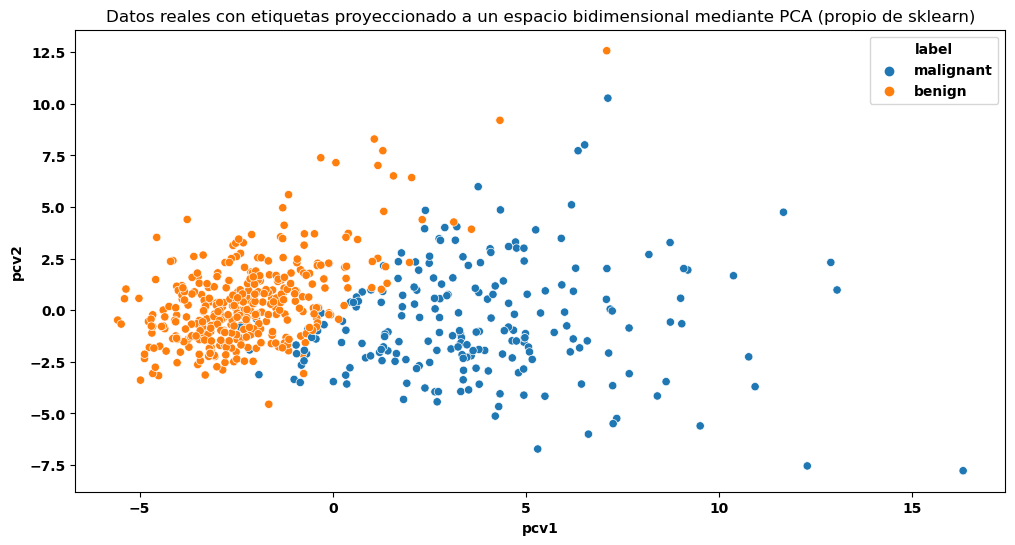

In [16]:
sns.scatterplot(x=df_pca_20_1_3['pcv1'], y=df_pca_20_1_3['pcv2'], hue=dataset_cancer['label'])

plt.title("Datos reales con etiquetas proyeccionado a un espacio bidimensional mediante PCA (propio de sklearn)")

plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


SSE =  5332.555574203132
Silhouette score =  0.5084690190672257


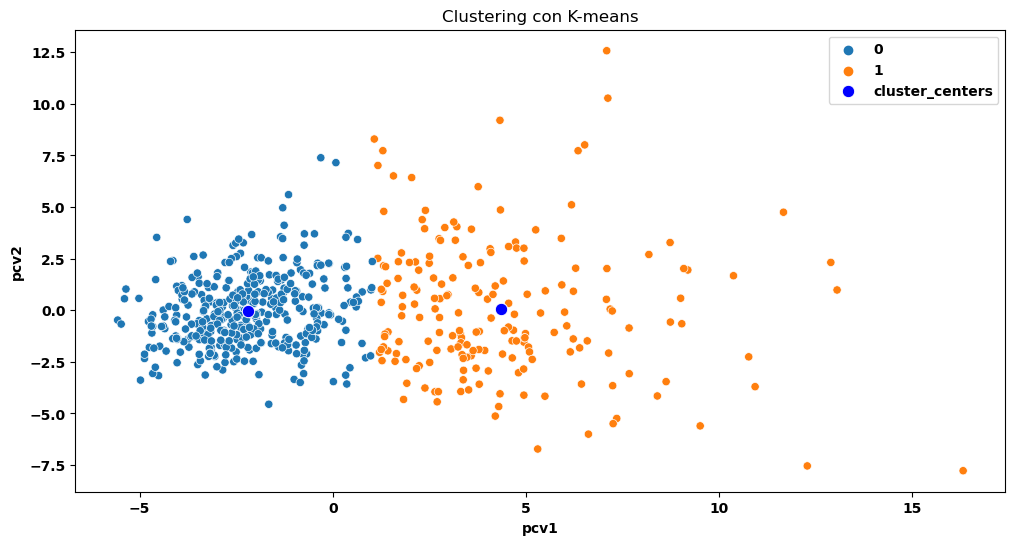

In [17]:
## Solución 20.1.4
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

modelo_pca_20_1_4 = KMeans(n_clusters=2, random_state=100)

modelo_pca_20_1_4.fit(df_pca_20_1_3)

y_etiquetas_pca_20_1_4 = modelo_pca_20_1_4.labels_

centros_clust_pca_20_1_4 = modelo_pca_20_1_4.cluster_centers_

print("SSE = ", modelo_pca_20_1_4.inertia_)
print("Silhouette score = ", silhouette_score(df_pca_20_1_3, y_etiquetas_pca_20_1_4))

sns.scatterplot(x=df_pca_20_1_3['pcv1'], y=df_pca_20_1_3['pcv2'], hue=y_etiquetas_pca_20_1_4)

sns.scatterplot(x=centros_clust_pca_20_1_4[:,df_pca_20_1_3.columns.get_loc("pcv1")],
                y=centros_clust_pca_20_1_4[:,df_pca_20_1_3.columns.get_loc("pcv2")],
                color='blue', s=80, label='cluster_centers')

plt.title("Clustering con K-means")
plt.show()

In [18]:
## Solución 20.1.5
y_pca_20_1_5 = np.where(y_etiquetas_pca_20_1_4 == 0, 'benign', 'malignant')

y_pca_20_1_5 = pd.Series(y_pca_20_1_5, name='label')

In [19]:
diff_pos_20_1_5 = [i for i in range(len(y_pca_20_1_5)) if y_pca_20_1_5[i] != dataset_cancer['label'][i]]

print("El modelo de clustering se ha equivocado en clasificar %s registros." % len(diff_pos_20_1_5))
print("El porcentaje de acierto es {acc}%".format(acc=(1 - len(diff_pos_20_1_5) / len(y_pca_20_1_5)) * 100))

El modelo de clustering se ha equivocado en clasificar 53 registros.
El porcentaje de acierto es 90.68541300527241%


> #### Explicación 20.1.5
> Ambos modelos presentan un porcentaje de acierto **muy parecido**, el modelo de PCA consigue errar en un registro menos que el modelo con los datos originales. Esto los lleva a un rendimiento, en cuanto a precisión muy parecido.
>
> Considero que dada la **complejidad adicional** que se añade al desarrollar un modelo de PCA, teniendo en cuenta los resultados que hemos adquirido, no creo que sea suficiente justificación para preferir este modelo ante el modelo que trabaja con los datos originales. 

---